In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


In [ ]:
#Import dataset
df=pd.read_csv('heart_study.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

In [ ]:
#drop and/or rename columns
df=df.drop(['education'],axis=1)

In [ ]:
df.rename(columns={'male':'sex_male'},inplace=True)

###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [ ]:
#Deal with null values
df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
ds = df.isin([np.inf, -np.inf])
print(ds)

      sex_male    age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        False  False          False       False   False            False   
1        False  False          False       False   False            False   
2        False  False          False       False   False            False   
3        False  False          False       False   False            False   
4        False  False          False       False   False            False   
...        ...    ...            ...         ...     ...              ...   
4235     False  False          False       False   False            False   
4236     False  False          False       False   False            False   
4237     False  False          False       False   False            False   
4238     False  False          False       False   False            False   
4239     False  False          False       False   False            False   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0 

In [ ]:
df['cigsPerDay'].fillna((df['cigsPerDay'].median()), inplace=True)

In [ ]:
df['BPMeds'].fillna((df['BPMeds'].mean()), inplace=True)

In [ ]:
df['glucose'].fillna((df['glucose'].mean()), inplace=True)

In [ ]:
df['BMI'].fillna((df['BMI'].mean()),inplace=True)

In [ ]:
df['totChol'].fillna(df['totChol'].mean(),inplace=True)

In [ ]:
df['heartRate'].fillna((df['heartRate'].mean()),inplace=True)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)



In [ ]:
df.isnull().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
ds = df.isin([np.inf, -np.inf])
print(ds)

      sex_male    age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        False  False          False       False   False            False   
1        False  False          False       False   False            False   
2        False  False          False       False   False            False   
3        False  False          False       False   False            False   
4        False  False          False       False   False            False   
...        ...    ...            ...         ...     ...              ...   
4235     False  False          False       False   False            False   
4236     False  False          False       False   False            False   
4237     False  False          False       False   False            False   
4238     False  False          False       False   False            False   
4239     False  False          False       False   False            False   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0 

In [ ]:
df['BMI']

0       26.97
1       28.73
2       25.34
3       28.58
4       23.10
        ...  
4235    22.00
4236    19.16
4237    21.47
4238    25.60
4239    20.91
Name: BMI, Length: 4240, dtype: float64

###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

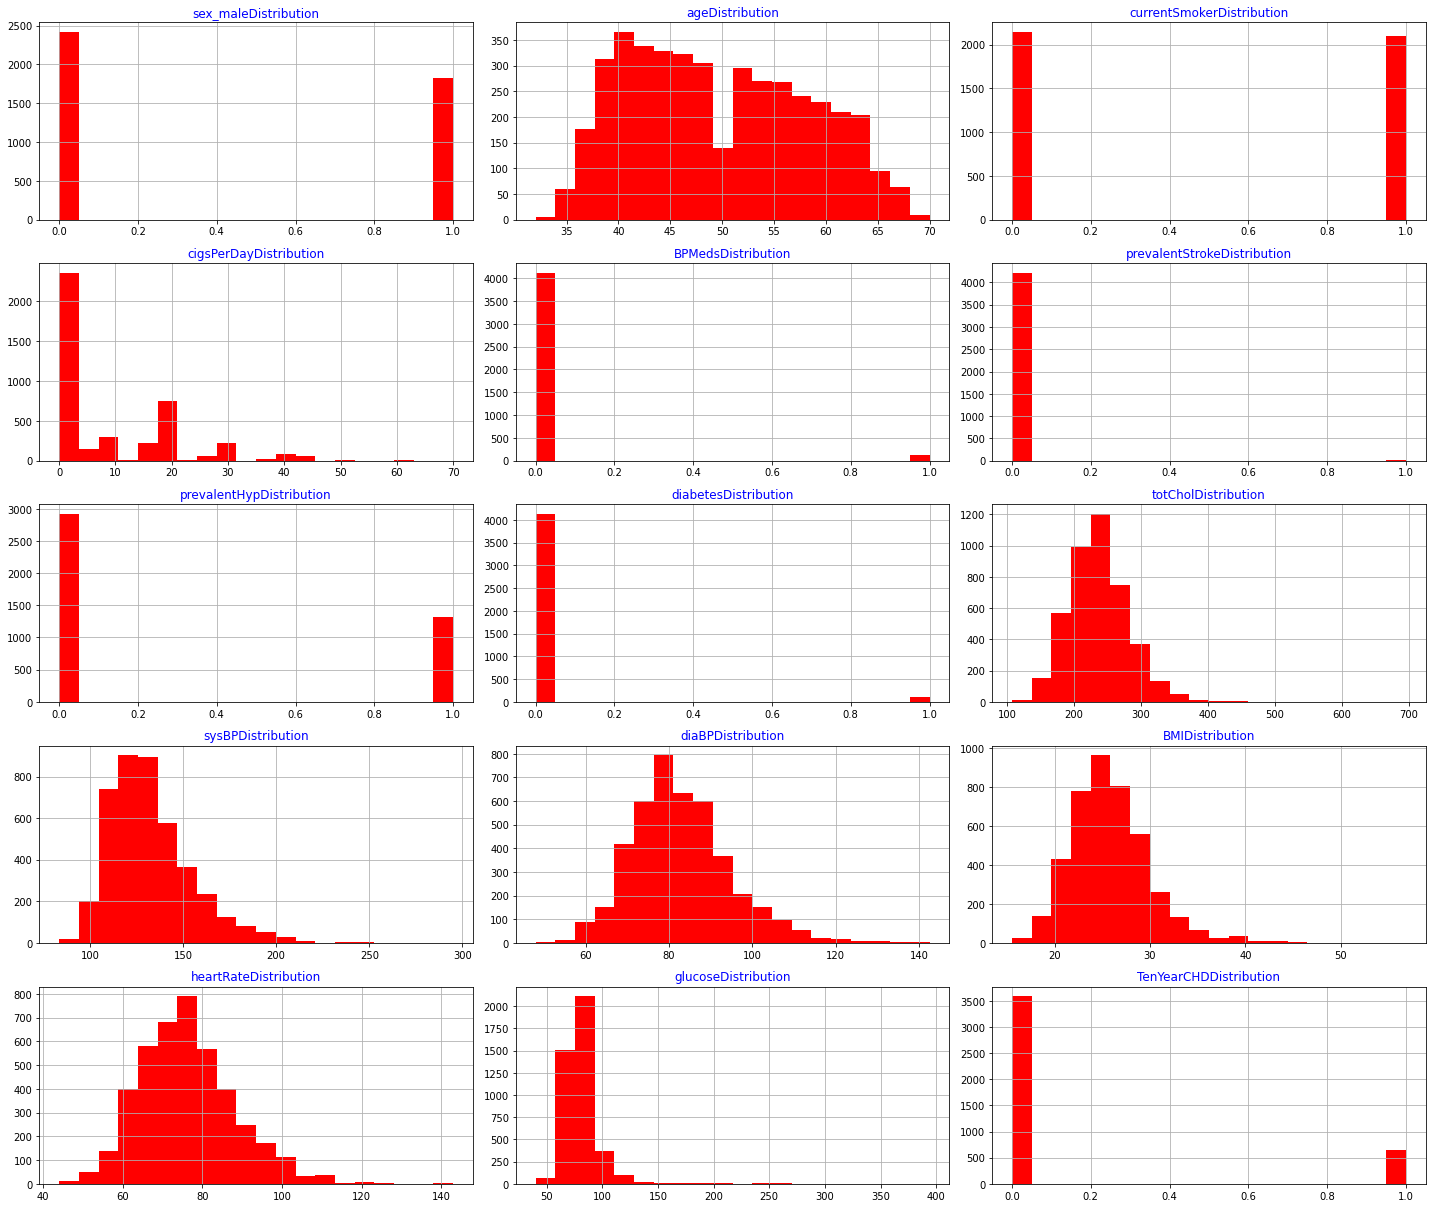

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

The ones having graphs at 0 &1 are binary,therefore have only two values 0 &1. The rest are distributed values along a range

###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

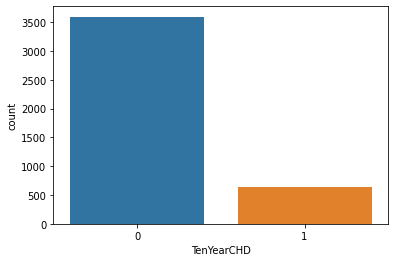

In [ ]:
#Code
import seaborn as sns
sns.countplot(x ='TenYearCHD', data = df)

###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression. 

In [ ]:
df.isnull().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#Split the dataset and fit the model
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
np.any(np.isnan(X_train))

False

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link. 

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [ ]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378445
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4225
Method:                           MLE   Df Model:                           14
Date:                Thu, 29 Dec 2022   Pseudo R-squ.:                  0.1116
Time:                        13:51:06   Log-Likelihood:                -1604.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 2.966e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1782      0.644    -12.696      0.000      -9.441      -6.916
sex_male            0.5046      0.100      5.028      0.000       0.308       0.701
age                 0.0624      0.006     10.112      0.000       0.050       0.075
currentSmoker       0.0145      0.143      0.101      0.919      -0.265       0.294
cigsPerDay          0.0214      0.006      3.791      0.000       0.010       0.032
BPMeds              0.2446      0.220      1.111      0.267      -0.187       0.676
prevalentStroke     0.9664      0.441      2.190      0.029       0.101       1.831
prevalentHyp        0.2297      0.128      1.788      0.074      -0.022       0.482
diabetes            0.1905      0.294      0.648      0.517      -0.386       0.767
totChol             0.0018      0.001      1.784      0.074      -0.000       0.004
sysBP               0.0142      0.004      4.021      0.000       0.007       0.021
diaBP              -0.0030      0.006     -0.505      0.613      -0.015       0.009
BMI                 0.0039      0.012      0.330      0.741      -0.019       0.027
heartRate          -0.0015      0.004     -0.375      0.708      -0.009       0.006
glucose             0.0067      0.002      3.125      0.002       0.003       0.011
===================================================================================
"""

In [ ]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Thu, 29 Dec 2022   Pseudo R-squ.:                  0.1091
Time:                        13:51:06   Log-Likelihood:                -1609.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 5.562e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4687      0.390    -21.739      0.000      -9.232      -7.705
sex_male            0.4845      0.097      4.985      0.000       0.294       0.675
age                 0.0648      0.006     10.941      0.000       0.053       0.076
cigsPerDay          0.0216      0.004      5.624      0.000       0.014       0.029
prevalentStroke     1.0466      0.436      2.399      0.016       0.192       1.901
sysBP               0.0171      0.002      8.526      0.000       0.013       0.021
glucose             0.0076      0.002      4.650      0.000       0.004       0.011
===================================================================================
"""

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000098       0.000451    0.000210   0.000
sex_male             1.341791       1.964007    1.623357   0.000
age                  1.054647       1.079425    1.066964   0.000
cigsPerDay           1.014184       1.029579    1.021852   0.000
prevalentStroke      1.211300       6.695671    2.847889   0.016
sysBP                1.013226       1.021206    1.017208   0.000
glucose              1.004399       1.010845    1.007617   0.000


###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [ ]:
#Split the new dataset and fit the model
new_df=df[['sex_male','age','cigsPerDay','prevalentStroke','sysBP','glucose','TenYearCHD']].copy()
new_df

,sex_male,age,cigsPerDay,prevalentStroke,sysBP,glucose,TenYearCHD
0,1,39,0.0,0,106.0,77.000000,0
1,0,46,0.0,0,121.0,76.000000,0
2,1,48,20.0,0,127.5,70.000000,0
3,0,61,30.0,0,150.0,103.000000,1
4,0,46,23.0,0,130.0,85.000000,0
...,...,...,...,...,...,...,...
4235,0,48,20.0,0,131.0,86.000000,0
4236,0,44,15.0,0,126.5,81.963655,0
4237,0,52,0.0,0,133.5,107.000000,0
4238,1,40,0.0,0,141.0,72.000000,0


In [ ]:
X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#Code for confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1196    6]
 [ 192   20]]


In [ ]:
TP=1196
FP=6
FN=192
FP=20



###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [ ]:
accuracy_score(y_test, y_pred)

0.85997171145686

In [ ]:
precision=TP / (TP + FP)
precision

0.9835526315789473

In [ ]:
recall=TP / (TP + FN)
recall

0.861671469740634